In [28]:
from __future__ import division
import itertools
import pandas as pd 
import numpy as np 

from time import time 
from matplotlib import pyplot as plt 
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, scale, RobustScaler, MinMaxScaler, Normalizer
import seaborn as sns
from sklearn.learning_curve import learning_curve, validation_curve

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [7]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5), n_jobs=-1, scoring=None):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)
    return estimator

In [8]:
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

def plot_error_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5), n_jobs=-1, scoring=rms_error):
    """
    Generate a simple plot of the test and traning error curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.xlabel("Training examples")
    plt.ylabel("Error")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

In [9]:
df = pd.read_csv('./LC.csv', index_col=0)

In [10]:
df.groupby('status_num').size()

status_num
-1    679563
 0    327948
 1    108921
dtype: int64

In [11]:
df.drop('emp_length', axis=1, inplace=True)  # many nans
df.dropna(inplace=True)

In [12]:
df.shape

(1115848, 23)

In [29]:
df2 = df[df['status_num'] >= 0]

In [30]:
df2.groupby('status_num').size() 

status_num
0    327731
1    108836
dtype: int64

In [31]:
df.groupby('status_num').size()

status_num
-1    679281
 0    327731
 1    108836
dtype: int64

In [32]:
df.dtypes

id                       int64
issue_d                 object
status_num             float64
grade                   object
home_ownership          object
verification_status     object
loan_status             object
purpose                 object
addr_state              object
initial_list_status     object
funded_amnt            float64
term                   float64
int_rate               float64
annual_inc             float64
dti                    float64
delinq_2yrs            float64
earliest_cr_line       float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
dtype: object

In [33]:
df.revol_bal.unique()


array([  13648.,    1687.,    2956., ...,  132246.,  102453.,   93022.])

In [34]:
features_cat=['grade','home_ownership','verification_status', 'purpose', 'initial_list_status', 
              'term', 'inq_last_6mths',  ]
#features_cat=['grade','home_ownership','verification_status','purpose','addr_state','initial_list_status']
features_num=['int_rate','dti','delinq_2yrs','earliest_cr_line','open_acc','pub_rec','total_acc', 'revol_util', 'revol_bal'] #'emp_length' 


In [35]:
X_categorical = pd.get_dummies(df2[features_cat])
df2 = pd.concat([df2.drop(features_cat, axis=1), X_categorical], axis=1)


In [37]:
X_unscaled = df2[features_num + X_categorical.columns.tolist()]
standard_scaler = Normalizer() 
X_ss = standard_scaler.fit_transform(X_unscaled.values)
robust_scaler = RobustScaler()
X_rs = robust_scaler.fit_transform(X_unscaled.values)
y = df2['status_num'].values

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure() 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [73]:
def classification_report_extended(y_test, p):
    cm = confusion_matrix(y_test, p)
    print classification_report(y_test, p
                            , target_names=['non-defaulted','defaulted'])
     
    # sensitivity = tp/tp+fn 
    sensitivity_0 = np.divide(cm[0][0], (cm[0][0] + cm[1][0]).astype('float'))
    sensitivity_1 = np.divide(cm[1][1], (cm[1][1] + cm[0][1]).astype('float'))
    
    # specificity = tn/tn+fp 
    specificity_0 = np.divide(cm[1][1], cm[1][1] + cm[0][1].astype('float'))
    specificity_1 = np.divide(cm[0][0], cm[0][0] + cm[1][0].astype('float'))
    
    G_0 = np.sqrt(sensitivity_0 * specificity_0)
    G_1 = np.sqrt(sensitivity_1 * specificity_1)
    print 'class\tSensitivity\tSpecificity\tG'
    print '0\t%s\t%s\t%s' %(sensitivity_0, specificity_0, G_0)
    print '1\t%s\t%s\t%s' %(sensitivity_1, specificity_1, G_1)
    
def classify(X_, y_, clf):
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3)
    # y_test[y_test==1].shape , y_train[y_train==1].shape 
    clf.fit(X_train, y_train)
    
    p = clf.predict(X_test)
    cm = confusion_matrix(y_test, p)
#     print cf_matrix
    
    plot_confusion_matrix(cm, classes=clf.classes_)
    
    
    pp = clf.predict_proba(X_test)
    
    return clf, p, pp, y_test

Confusion matrix, without normalization
[[92332  5964]
 [27638  5037]]


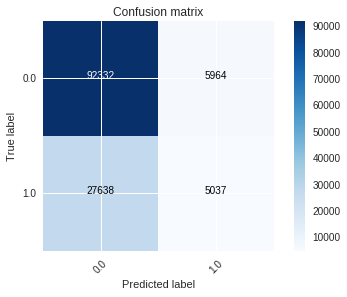

               precision    recall  f1-score   support

non-defaulted       0.77      0.94      0.85     98296
    defaulted       0.46      0.15      0.23     32675

  avg / total       0.69      0.74      0.69    130971

class	Sensitivity	Specificity	G
0	0.769625739768	0.457867466594	0.593621586276
1	0.457867466594	0.769625739768	0.593621586276


In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.25)
clf = RandomForestClassifier(n_jobs=-1, criterion='entropy')
clf, p, pp, _ = classify(X_ss, y, clf)

Confusion matrix, without normalization
[[92089  6166]
 [27334  5382]]


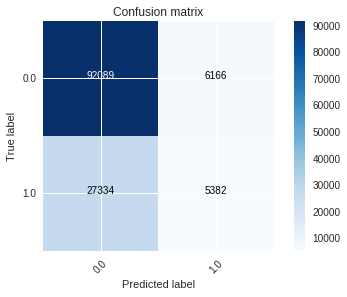

               precision    recall  f1-score   support

non-defaulted       0.77      0.94      0.85     98255
    defaulted       0.47      0.16      0.24     32716

  avg / total       0.69      0.74      0.70    130971

class	Sensitivity	Specificity	G
0	0.771116116661	0.466054728091	0.599485039077
1	0.466054728091	0.771116116661	0.599485039077


In [26]:
clf = RandomForestClassifier()
clf, p, pp, _ = classify(X_rs, y, clf)

In [41]:
importances = clf.feature_importances_
def print_feature_importance(importances, columns=None):
    indices = np.argsort(importances)[::-1]
    
    if not columns:
        columns = ['feature %s' %(i+1) for i in range(len(indices))]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(len(indices)):
        print("%d.  %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
print_feature_importance(importances, X_unscaled.columns.tolist())

Feature ranking:
1.  dti (0.076302)
2.  total_acc (0.068745)
3.  open_acc (0.068098)
4.  earliest_cr_line (0.068013)
5.  revol_util (0.067956)
6.  int_rate (0.067425)
7.  term (0.061525)
8.  revol_bal (0.054223)
9.  inq_last_6mths (0.041497)
10.  purpose_debt_consolidation (0.038520)
11.  initial_list_status_f (0.034259)
12.  home_ownership_MORTGAGE (0.029806)
13.  home_ownership_RENT (0.027284)
14.  grade_B (0.024942)
15.  verification_status_Verified (0.024619)
16.  initial_list_status_w (0.024317)
17.  verification_status_Source Verified (0.023303)
18.  grade_A (0.022522)
19.  verification_status_Not Verified (0.021037)
20.  grade_C (0.020664)
21.  delinq_2yrs (0.020037)
22.  purpose_credit_card (0.017472)
23.  pub_rec (0.017210)
24.  grade_E (0.016315)
25.  grade_D (0.016250)
26.  home_ownership_OWN (0.009596)
27.  purpose_other (0.007320)
28.  purpose_home_improvement (0.007031)
29.  grade_F (0.006800)
30.  purpose_small_business (0.003062)
31.  purpose_major_purchase (0.002939)
3

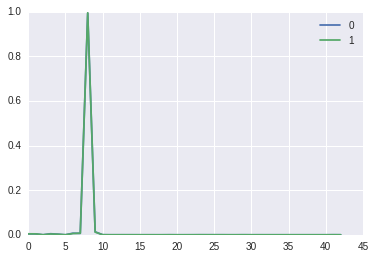

In [43]:
for i in [0, 1]:
    plt.plot(X_ss[y==i].mean(axis=0), label=i)
#     plt.plot(X_rs[y==i].mean(axis=0), label=i, marker='.')
    plt.legend()

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA() 
pca.fit(X_ss)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
for i in  zip(pca.explained_variance_, pca.explained_variance_ratio_):
    print i 

(0.012308824755997318, 0.9174295832348689)
(0.00033744107221789341, 0.025150932634762806)
(0.00028608914308878974, 0.021323452767827052)
(0.00017507711786685873, 0.013049249661328855)
(0.00012075596723761232, 0.0090004609613072543)
(9.9299167157899094e-05, 0.0074011934808685649)
(5.0894679244811958e-05, 0.0037933990688826689)
(2.2423155158425227e-05, 0.0016712940755600225)
(3.9111253333357749e-06, 0.00029151297184512126)
(2.067763365852769e-06, 0.00015411928600562238)
(1.3626866411531014e-06, 0.00010156688896425179)
(1.1761473794776581e-06, 8.7663316487727739e-05)
(9.550200717557205e-07, 7.1181748361872304e-05)
(8.9697197689146473e-07, 6.6855174498437899e-05)
(7.9878985184366547e-07, 5.9537238964435902e-05)
(6.6714230012922743e-07, 4.9724981425841847e-05)
(6.2525840275901357e-07, 4.6603194637067803e-05)
(5.3034324128599631e-07, 3.952875993196463e-05)
(4.5014560489431791e-07, 3.3551285592232058e-05)
(3.8245335991184865e-07, 2.8505891792776052e-05)
(3.4670430376711395e-07, 2.584136107355

----- n_components 2 ----
Confusion matrix, without normalization
[[91431  6636]
 [27600  5304]]


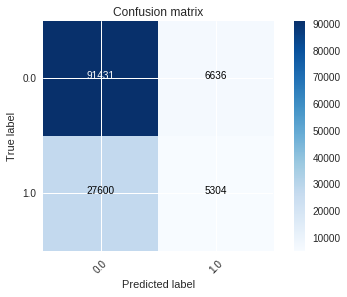

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98067
    defaulted       0.44      0.16      0.24     32904

  avg / total       0.69      0.74      0.69    130971

----- n_components 5 ----
Confusion matrix, without normalization
[[91788  6611]
 [27258  5314]]


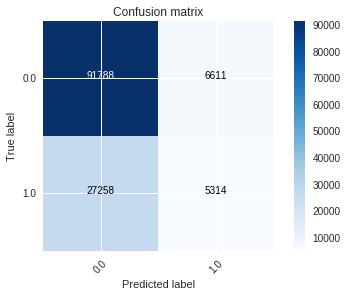

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98399
    defaulted       0.45      0.16      0.24     32572

  avg / total       0.69      0.74      0.69    130971

----- n_components 8 ----
Confusion matrix, without normalization
[[91633  6527]
 [27650  5161]]


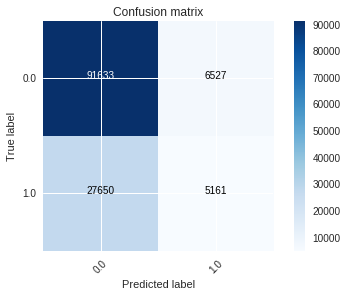

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98160
    defaulted       0.44      0.16      0.23     32811

  avg / total       0.69      0.74      0.69    130971

----- n_components 11 ----
Confusion matrix, without normalization
[[91748  6596]
 [27317  5310]]


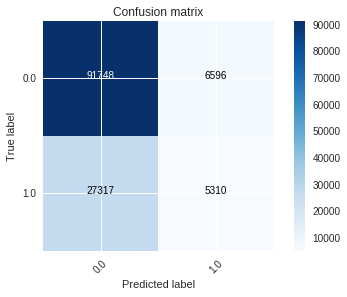

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98344
    defaulted       0.45      0.16      0.24     32627

  avg / total       0.69      0.74      0.69    130971

----- n_components 14 ----
Confusion matrix, without normalization
[[91497  6654]
 [27439  5381]]


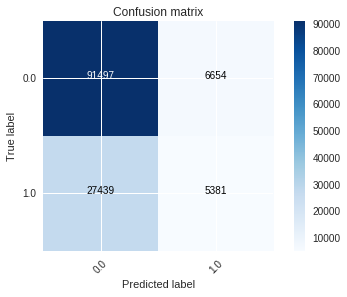

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98151
    defaulted       0.45      0.16      0.24     32820

  avg / total       0.69      0.74      0.69    130971

----- n_components 17 ----
Confusion matrix, without normalization
[[91555  6711]
 [27366  5339]]


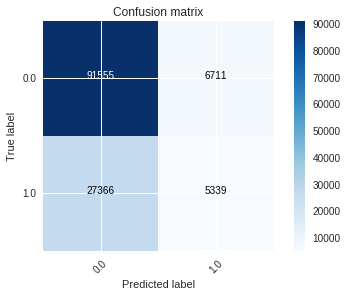

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98266
    defaulted       0.44      0.16      0.24     32705

  avg / total       0.69      0.74      0.69    130971

----- n_components 20 ----
Confusion matrix, without normalization
[[91651  6663]
 [27402  5255]]


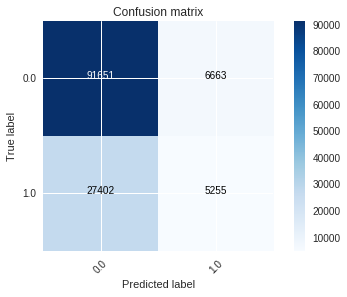

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98314
    defaulted       0.44      0.16      0.24     32657

  avg / total       0.69      0.74      0.69    130971

----- n_components 23 ----
Confusion matrix, without normalization
[[91589  6577]
 [27510  5295]]


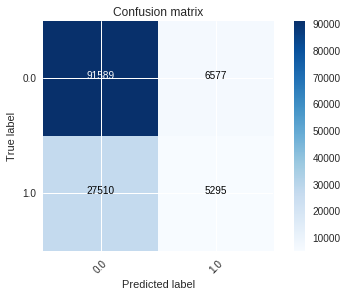

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98166
    defaulted       0.45      0.16      0.24     32805

  avg / total       0.69      0.74      0.69    130971

----- n_components 26 ----
Confusion matrix, without normalization
[[91772  6754]
 [27046  5399]]


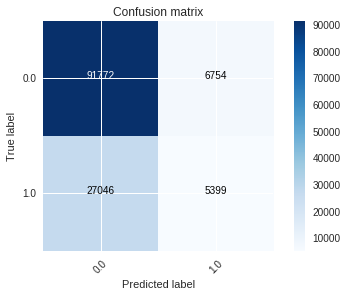

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98526
    defaulted       0.44      0.17      0.24     32445

  avg / total       0.69      0.74      0.70    130971

----- n_components 29 ----
Confusion matrix, without normalization
[[91549  6683]
 [27538  5201]]


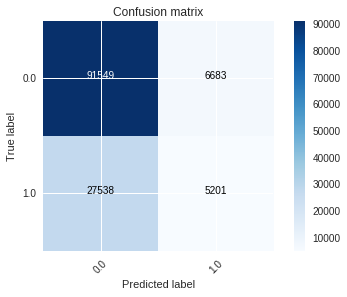

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98232
    defaulted       0.44      0.16      0.23     32739

  avg / total       0.69      0.74      0.69    130971

----- n_components 32 ----
Confusion matrix, without normalization
[[91488  6850]
 [27271  5362]]


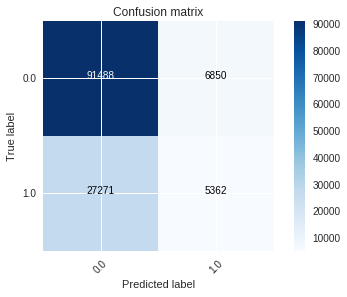

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98338
    defaulted       0.44      0.16      0.24     32633

  avg / total       0.69      0.74      0.69    130971

----- n_components 35 ----
Confusion matrix, without normalization
[[91595  6671]
 [27393  5312]]


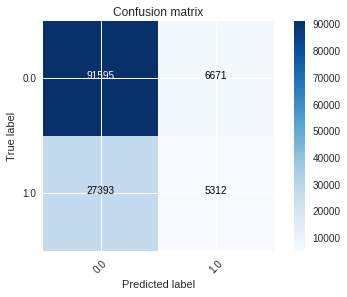

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98266
    defaulted       0.44      0.16      0.24     32705

  avg / total       0.69      0.74      0.69    130971

----- n_components 38 ----
Confusion matrix, without normalization
[[91736  6731]
 [27236  5268]]


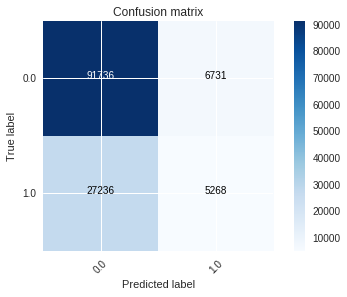

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98467
    defaulted       0.44      0.16      0.24     32504

  avg / total       0.69      0.74      0.69    130971

----- n_components 41 ----
Confusion matrix, without normalization
[[91637  6840]
 [27254  5240]]


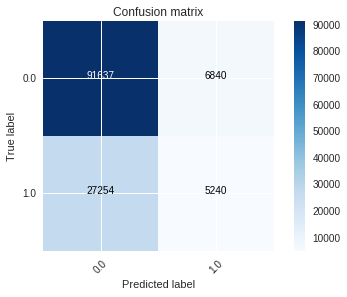

               precision    recall  f1-score   support

non-defaulted       0.77      0.93      0.84     98477
    defaulted       0.43      0.16      0.24     32494

  avg / total       0.69      0.74      0.69    130971



In [125]:
n_components_array = range(2, X_ss.shape[1]+1, 3)
for n_components in n_components_array:
    print '-' * 5, 'n_components', n_components, '-' * 4
    X_reduced = pca.fit_transform(X_ss)
    clf = RandomForestClassifier(n_jobs=-1)
    classify(X_reduced, y, clf)
#     X_reduced.shape 

### Clustering 

In [28]:
# labels = y_train
# sample_size = 300
# def bench_k_means(estimator, name, data):
#     t0 = time()
#     estimator.fit(data)
#     print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
#           % (name, (time() - t0), estimator.inertia_,
#              metrics.homogeneity_score(labels, estimator.labels_),
#              metrics.completeness_score(labels, estimator.labels_),
#              metrics.v_measure_score(labels, estimator.labels_),
#              metrics.adjusted_rand_score(labels, estimator.labels_),
#              metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
#              metrics.silhouette_score(data, estimator.labels_,
#                                       metric='euclidean',
#                                       sample_size=sample_size)))
#     return estimator

In [29]:

# kmeans2 = bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10),
#               name="k-means++", data=X_train)

In [30]:
# p_kmeans = kmeans2.predict(X_test)

In [126]:
# print classification_report(y_test, p_kmeans)

In [247]:
# _ = sns.pairplot(df2[:50], hue='status_num', size=1.5)

In [27]:
# plt.figure(figsize=(12, 10))
# _ = sns.corrplot(df2, annot=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

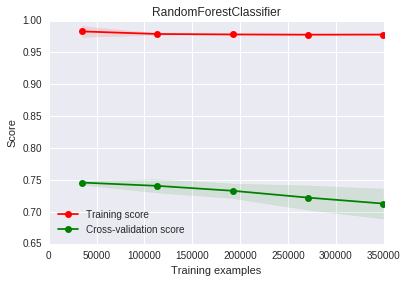

In [26]:
plot_learning_curve(RandomForestClassifier(), 'RandomForestClassifier', 
                    X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

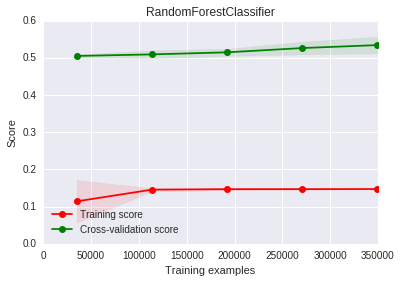

In [46]:
plot_learning_curve(RandomForestClassifier(), 'RandomForestClassifier', 
                    X, y, scoring=rms_error)

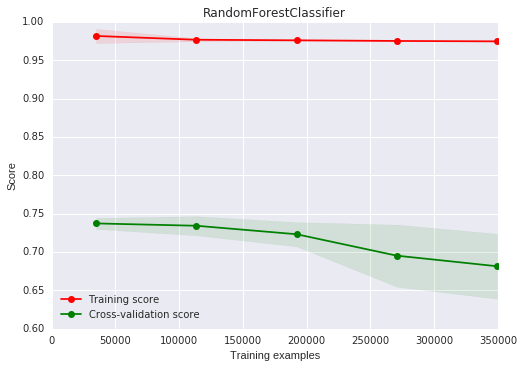

In [252]:
plot_learning_curve(
    RandomForestClassifier(), 
    'RandomForestClassifier', 
    X[:, :5], 
    y)

Pipeline(steps=[('fs', SelectKBest(k='all', score_func=<function f_classif at 0x7ff1c4d58c80>)), ('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

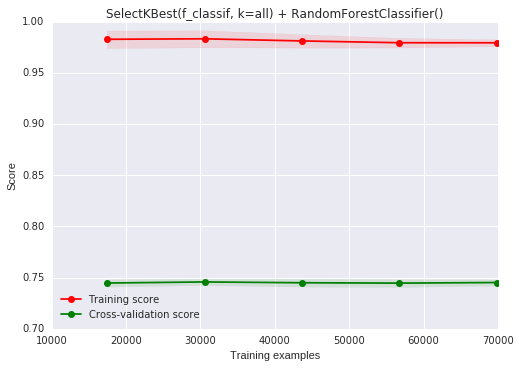

In [277]:
plot_learning_curve(
    Pipeline([("fs", SelectKBest(f_classif, k='all')), 
             ('RandomForest', RandomForestClassifier())]),
    "SelectKBest(f_classif, k=all) + RandomForestClassifier()",
    X,y,
#     train_sizes=np.linspace(.05, 0.2, 5)
)

Pipeline(steps=[('fs', SelectKBest(k=10, score_func=<function f_classif at 0x7ff1c4d58c80>)), ('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

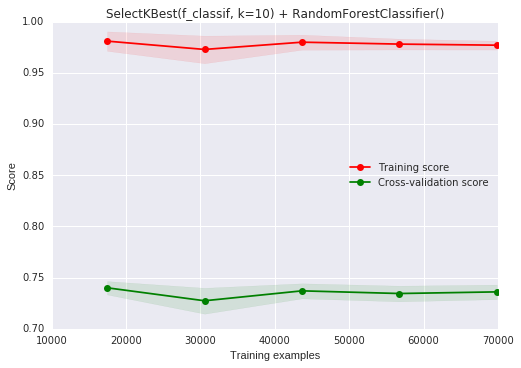

In [279]:
plot_learning_curve(
    Pipeline([("fs", SelectKBest(f_classif, k=10)), 
             ('RandomForest', RandomForestClassifier())]),
    "SelectKBest(f_classif, k=10) + RandomForestClassifier()",
    X,y,
    train_sizes=np.linspace(.05, 0.2, 5)
)

Pipeline(steps=[('fs', SelectKBest(k=5, score_func=<function f_classif at 0x7ff1c4d58c80>)), ('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

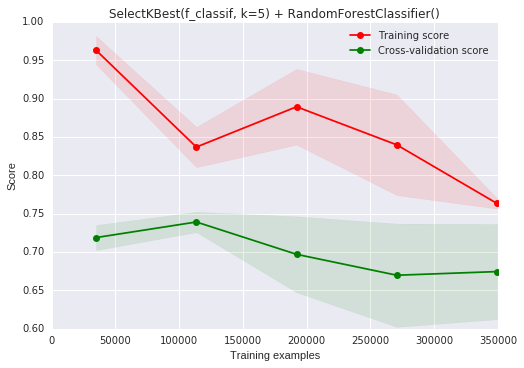

In [281]:
plot_learning_curve(
    Pipeline([("fs", SelectKBest(f_classif, k=5)), 
             ('RandomForest', RandomForestClassifier())]),
    "SelectKBest(f_classif, k=5) + RandomForestClassifier()",
    X,y,
#     train_sizes=np.linspace(.05, 0.2, 5)
)

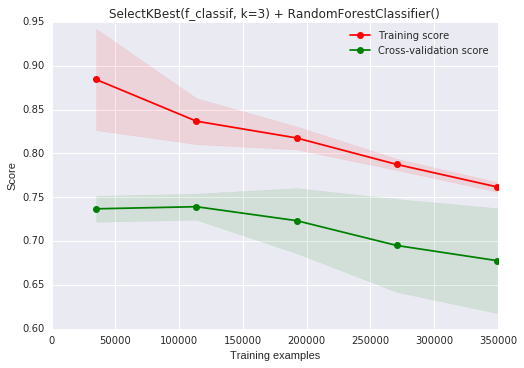

In [258]:
plot_learning_curve(
    Pipeline([("fs", SelectKBest(f_classif, k=3)), 
             ('RandomForest', RandomForestClassifier())]),
    "SelectKBest(f_classif, k=3) + RandomForestClassifier()",
    X,y,
#     train_sizes=np.linspace(.05, 0.2, 5)
)

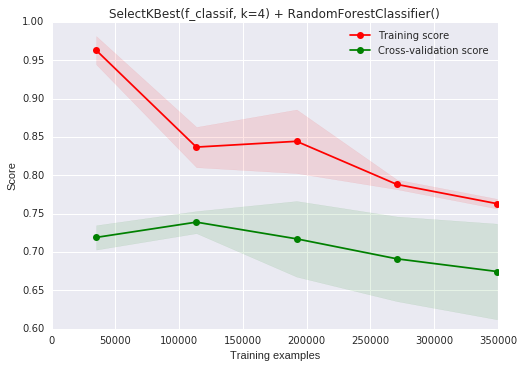

In [259]:
plot_learning_curve(
    Pipeline([("fs", SelectKBest(f_classif, k=4)), 
             ('RandomForest', RandomForestClassifier())]),
    "SelectKBest(f_classif, k=4) + RandomForestClassifier()",
    X,y,
#     train_sizes=np.linspace(.05, 0.2, 5)
)

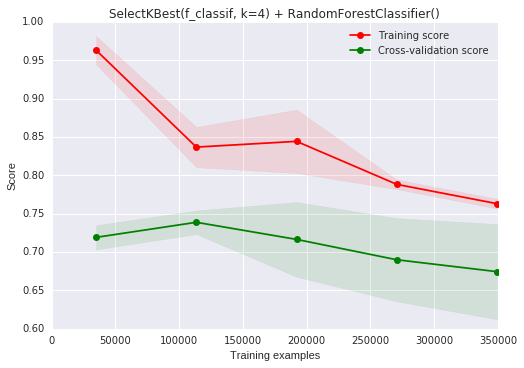

In [274]:
estimator = RandomForestClassifier( n_jobs=-1, criterion='entropy')
clf= plot_learning_curve(
    Pipeline([("fs", SelectKBest(f_classif, k=4)), 
             ('RandomForest', estimator)]),
    "SelectKBest(f_classif, k=4) + RandomForestClassifier()",
    X,y,
#     train_sizes=np.linspace(.05, 0.2, 5)
)

In [47]:
bestK = SelectKBest(f_classif, k=4)

In [48]:
bestK.fit(X_ss, y)

SelectKBest(k=4, score_func=<function f_classif at 0x7fc2113380c8>)

In [49]:
for i in zip(bestK.scores_, bestK.pvalues_):
    print i 

(3.7239440652967759, 0.053638179401182651)
(3.5789905751627895, 0.058515358841329558)
(38.850738276567974, 4.5789659476224464e-10)
(115.8594334422983, 5.1421225646179151e-27)
(82.997091872525644, 8.2506744670293318e-20)
(5.5267722842106437, 0.018728064521515344)
(142.21429122701983, 8.8333392519601634e-33)
(299.91808855583804, 3.6151517120566246e-67)
(55.196643030040811, 1.0925210150527011e-13)
(38.14503939801773, 6.5734082135615533e-10)
(0.16812382179186799, 0.68178483898441034)
(487.81737495778191, 4.876507041145182e-108)
(208.83849257339409, 2.5247820868600185e-47)
(2.9462906733801817, 0.086075622907184027)
(82.156592563535511, 1.262194551277156e-19)
(129.45927570974658, 5.4336062047500351e-30)
(187.04859099100656, 1.4301361934120821e-42)
(63.384407597753828, 1.7046276542993904e-15)
(0.3320889189293057, 0.56443193530932056)
(195.09350225196201, 2.5128380719034832e-44)
(1.2888053973645281, 0.25626884068897027)
(2.1234068356749036, 0.14506426746721568)
(2.1138198831503883, 0.145975259

In [38]:
df.dtypes

id                       int64
issue_d                 object
status_num             float64
grade                   object
home_ownership          object
verification_status     object
loan_status             object
purpose                 object
addr_state              object
initial_list_status     object
funded_amnt            float64
term                   float64
int_rate               float64
annual_inc             float64
dti                    float64
delinq_2yrs            float64
earliest_cr_line       float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
dtype: object

In [39]:
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

### Regression 

In [79]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV, LassoCV 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.gaussian_process import GaussianProcessRegressor

In [85]:
models = {
    'LinearRegression': LinearRegression(fit_intercept=True),
    'ElasticNetCV': ElasticNetCV(fit_intercept=True,n_jobs=-1),
    'LassoCV': LassoCV(n_jobs=-1),
#     'Gaussian': GaussianProcessRegressor,
#     'LinearSVR': LinearSVR(), 
    'Ridge': RidgeCV(),
#     'NuSVR': NuSVR(),
#     'SVR': SVR(),
#     'RFRegressor': RandomForestRegressor(n_estimators=50, n_jobs=-1)  # --> Dangerous! Very time consuming..
}

In [86]:
n_folds = 5
kf = KFold(X_ss.shape[0], n_folds=n_folds)
err = dict.fromkeys(models.keys(), 0)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3)

In [88]:
for model_name, model in models.iteritems():
    print 'training', model_name, '..'
    t0 = time()
#     for train, test in kf: 
    model.fit(X_train, y_train)
    
#         p = np.squeeze(map(model.predict, X[test]))
#         e = p - y[test]
#         error = np.dot(e,e)
#         err[model_name] += error
#     plot_error_curve(model, model_name, 
#                     X_ss, y, scoring=rms_error)
    print '\t..', time()-t0, 'seconds.'
print 'Done!'

training Ridge ..
	.. 2.00461816788 seconds.
training LinearRegression ..
	.. 0.777284145355 seconds.
training ElasticNetCV ..
	.. 5.52764701843 seconds.
training LassoCV ..
	.. 33.0461609364 seconds.
Done!


In [72]:
# print 'RMSE on {}-fold CV:'.format(n_folds)
# for model, error in err.iteritems():
#     rmse_10cv = np.sqrt(error/X.shape[0])
#     print model, rmse_10cv

RMSE on 5-fold CV:
LinearRegression 27174101871.3
ElasticNetCV 0.417926508087
LassoCV 0.418009200741


In [55]:
# X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3)

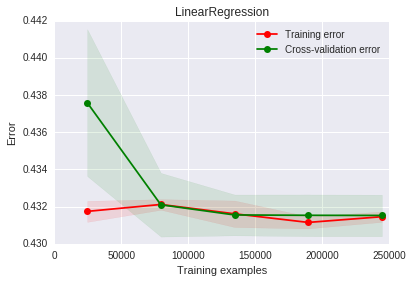

In [56]:
model = LinearRegression()
clf = plot_error_curve(model, 'LinearRegression', 
                    X_train, y_train, scoring=rms_error)

In [89]:
# clf = LinearRegression()
# clf.fit(X_train, y_train)

In [90]:
# p_r = clf.predict(X_test)

In [91]:
# zip(p_r[:5], y_test[:5])

In [64]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix
 


In [77]:
def regression_results(y_test_, p, threshold=0.5):
    binerizer = Binarizer(threshold=threshold)
    p_tr = binerizer.fit_transform(p)
    plot_confusion_matrix(confusion_matrix(p_tr[:][0], y_test_), classes=[0, 1])
    print classification_report_extended(p_tr[:][0], y_test_)

In [94]:
def see_results(th=0.5):
    for model_name, clf in models.iteritems():
        p_r = clf.predict(X_test)
        regression_results(y_test, p_r, threshold=th)

Confusion matrix, without normalization
[[98136 32541]
 [  187   107]]


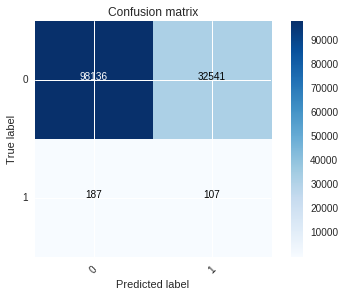

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130677
    defaulted       0.00      0.36      0.01       294

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.998098105225	0.00327738299436	0.0571939660871
1	0.00327738299436	0.998098105225	0.0571939660871
None
Confusion matrix, without normalization
[[98090 32518]
 [  233   130]]


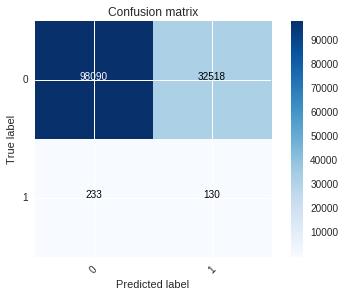

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130608
    defaulted       0.00      0.36      0.01       363

  avg / total       0.99      0.75      0.85    130971

class	Sensitivity	Specificity	G
0	0.997630259451	0.00398186718941	0.0630272258415
1	0.00398186718941	0.997630259451	0.0630272258415
None
Confusion matrix, without normalization
[[98144 32541]
 [  179   107]]


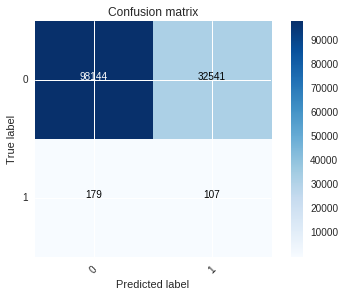

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130685
    defaulted       0.00      0.37      0.01       286

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.998179469707	0.00327738299436	0.057196297252
1	0.00327738299436	0.998179469707	0.057196297252
None
Confusion matrix, without normalization
[[98106 32529]
 [  217   119]]


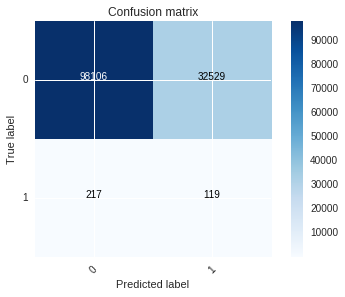

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130635
    defaulted       0.00      0.35      0.01       336

  avg / total       1.00      0.75      0.85    130971

class	Sensitivity	Specificity	G
0	0.997792988416	0.00364493996569	0.0603066790743
1	0.00364493996569	0.997792988416	0.0603066790743
None


In [95]:
see_results(0.4)

Confusion matrix, without normalization
[[98295 32628]
 [   28    20]]


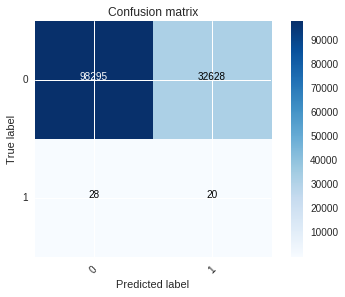

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130923
    defaulted       0.00      0.42      0.00        48

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999715224312	0.000612594952218	0.0247471311482
1	0.000612594952218	0.999715224312	0.0247471311482
None
Confusion matrix, without normalization
[[98269 32598]
 [   54    50]]


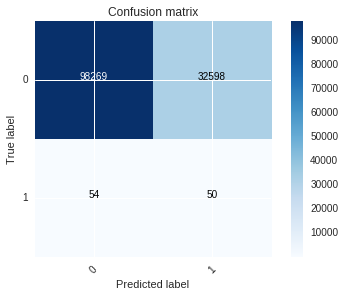

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130867
    defaulted       0.00      0.48      0.00       104

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999450789744	0.00153148738054	0.0391234746919
1	0.00153148738054	0.999450789744	0.0391234746919
None
Confusion matrix, without normalization
[[98295 32632]
 [   28    16]]


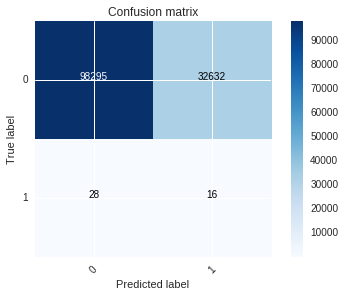

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130927
    defaulted       0.00      0.36      0.00        44

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999715224312	0.000490075961774	0.0221345069982
1	0.000490075961774	0.999715224312	0.0221345069982
None
Confusion matrix, without normalization
[[98283 32610]
 [   40    38]]


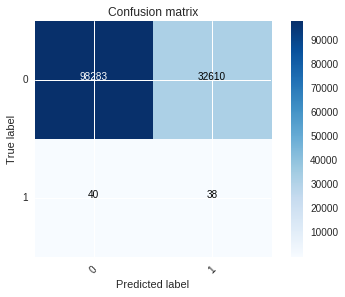

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130893
    defaulted       0.00      0.49      0.00        78

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999593177588	0.00116393040921	0.0341094839632
1	0.00116393040921	0.999593177588	0.0341094839632
None


In [96]:
see_results(0.6)

Confusion matrix, without normalization
[[98309 32644]
 [   14     4]]


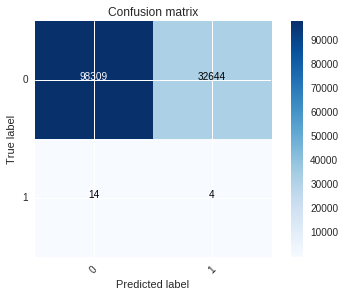

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130953
    defaulted       0.00      0.22      0.00        18

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999857612156	0.000122518990444	0.0110680416167
1	0.000122518990444	0.999857612156	0.0110680416167
None
Confusion matrix, without normalization
[[98297 32623]
 [   26    25]]


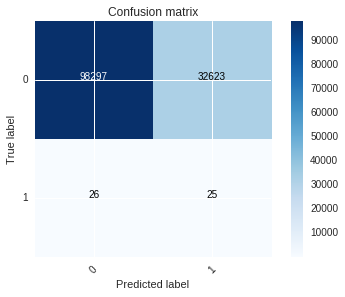

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130920
    defaulted       0.00      0.49      0.00        51

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999735565432	0.000765743690272	0.0276684152269
1	0.000765743690272	0.999735565432	0.0276684152269
None
Confusion matrix, without normalization
[[98308 32646]
 [   15     2]]


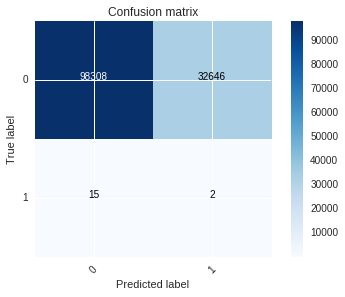

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130954
    defaulted       0.00      0.12      0.00        17

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999847441596	6.12594952218e-05	0.00782624747698
1	6.12594952218e-05	0.999847441596	0.00782624747698
None
Confusion matrix, without normalization
[[98303 32634]
 [   20    14]]


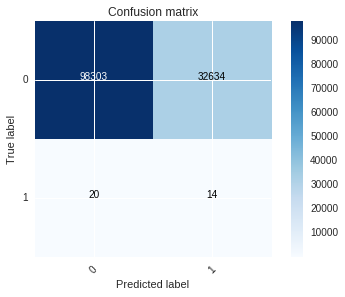

               precision    recall  f1-score   support

non-defaulted       1.00      0.75      0.86    130937
    defaulted       0.00      0.41      0.00        34

  avg / total       1.00      0.75      0.86    130971

class	Sensitivity	Specificity	G
0	0.999796588794	0.000428816466552	0.0207057779491
1	0.000428816466552	0.999796588794	0.0207057779491
None


In [97]:
see_results(0.7)

Confusion matrix, without normalization
[[92242 26395]
 [ 5941  6393]]


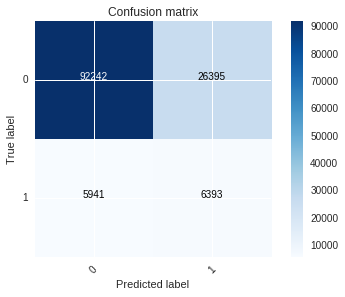

             precision    recall  f1-score   support

        0.0       0.94      0.78      0.85    118637
        1.0       0.19      0.52      0.28     12334

avg / total       0.87      0.75      0.80    130971



In [169]:
regression_results(0.44)

In [172]:
cm = confusion_matrix(p_r_5[:][0], y_test)
print cm 

[[95960 29907]
 [ 2223  2881]]


In [201]:
# sensitivity = tp/tp+fn 
sensitivity_0 = np.divide(cm[0][0], (cm[0][0] + cm[1][0]).astype('float'))
sensitivity_1 = np.divide(cm[1][1], (cm[1][1] + cm[0][1]).astype('float'))
sensitivity_0, sensitivity_1 

(0.9773586058686331, 0.087867512504574849)

In [204]:
# specificity = tn/tn+fp 
specificity_0 = np.divide(cm[1][1], cm[1][1] + cm[0][1].astype('float'))
specificity_1 = np.divide(cm[0][0], cm[0][0] + cm[1][0].astype('float'))
specificity_0, specificity_1
G_0 = np.sqrt(sensitivity_0 * specificity_0)
G_1 = np.sqrt(sensitivity_1 * specificity_1)
G_0, G_1

(0.087867512504574849, 0.9773586058686331)

In [205]:
G_0 = np.sqrt(sensitivity_0 * specificity_0)
G_1 = np.sqrt(sensitivity_1 * specificity_1)
G_0, G_1

(0.29304960249523621, 0.29304960249523621)